 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("/Users/matt/Desktop/Starter_Code_2/Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

display(whale_returns_df.head())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_null_count = whale_returns_df.isnull().sum()


print(whale_returns_null_count)


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

display(whale_returns_df.head())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("/Users/matt/Desktop/Starter_Code_2/Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)



In [6]:
# Count nulls
algo_returns_null_count = algo_returns_df.isnull().sum()
print(algo_returns_null_count)


Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
display(algo_returns_df.head())



,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = Path("/Users/matt/Desktop/Starter_Code_2/Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [9]:
# Check Data Types
data_type_sp = sp500_history_df.dtypes
print(data_type_sp)

Close    object
dtype: object


In [10]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$"," ").astype(float)
sp500_history_df.head()

/var/folders/zs/mcg4c63n0vl83nylzs3npqv00000gn/T/ipykernel_44925/3672488314.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$"," ").astype(float)


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [22]:
# Sorting the sp500 daily returns
# How can I sort the data before calculating the pct change?
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [23]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()
sp500_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [24]:
# Drop nulls
sp500_history_df = sp500_history_df.dropna()
display(sp500_history_df.head())

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename(columns={"Close": "SP Close"}, inplace=True)
print(sp500_history_df)

            SP Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df],axis="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

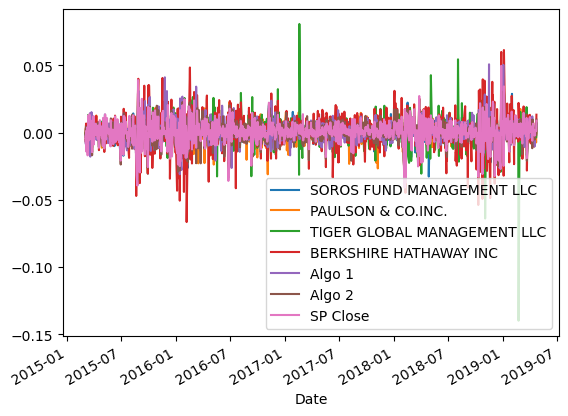

In [28]:
# Plot daily returns of all portfolios
display(all_portfolios.plot())

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

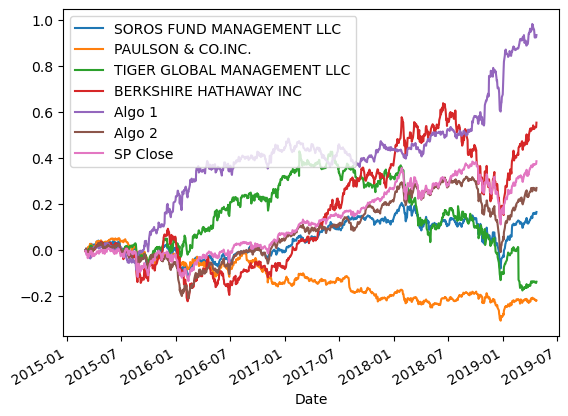

In [35]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1+ all_portfolios).cumprod() - 1

# Plot cumulative returns
display(cumulative_returns_all.plot())

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

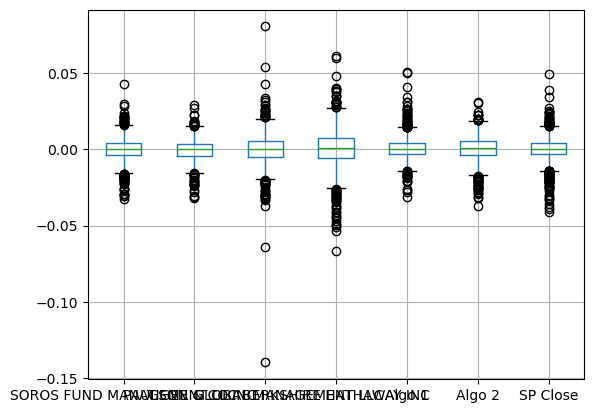

In [39]:
# Box plot to visually show risk

all_portfolios.boxplot()

### Calculate Standard Deviations

In [40]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_std_values = all_portfolios.std(axis=0)
display(all_portfolios_std_values)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP Close                       0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [42]:
# Calculate  the daily standard deviation of S&P 500
sp500_std_values = sp500_history_df.std()
display(sp500_std_values)
# Determine which portfolios are riskier than the S&P 500
volatility = all_portfolios.std()*np.sqrt((252))
volatility.sort_values(inplace=True)
display(volatility)


SP Close    0.008111
dtype: float64

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP Close                       0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
std_daily = sp500_history_df.std()
std_annual = std_daily * (252**.5)
display(std_annual)



SP Close    0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
display(rolling_std_21)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


### Calculate and plot the correlation

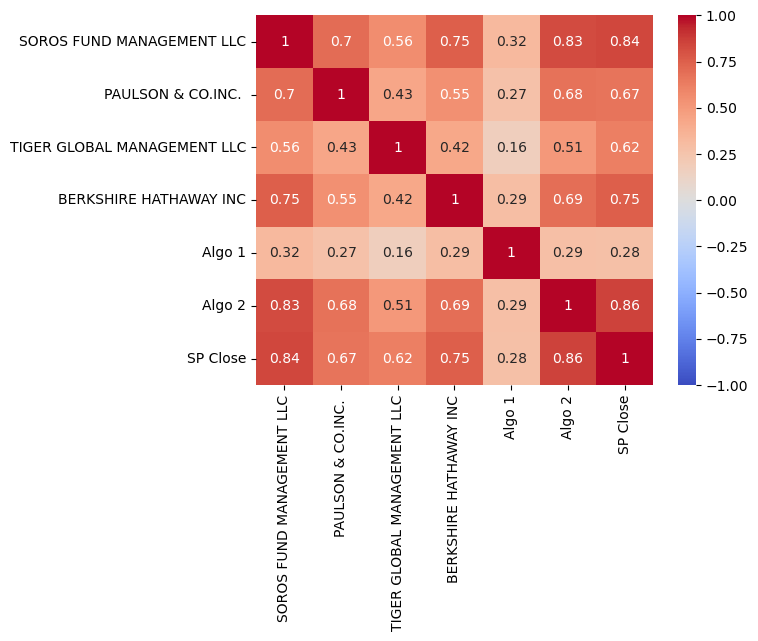

In [46]:
# Calculate the correlation
correlation_matrix = all_portfolios.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,0.000061,0.000038,0.000048,0.000076
PAULSON & CO.INC.,0.000038,0.000049,0.000033,0.000049
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000117,0.000059
BERKSHIRE HATHAWAY INC,0.000076,0.000049,0.000059,0.000165


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 1043, dtype: float64

<Axes: xlabel='Date'>

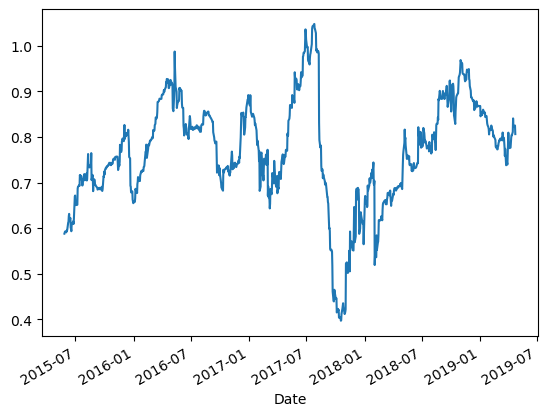

In [50]:
# Calculate covariance of a single portfolio
covariance_matrix = whale_returns_df.cov()
display(covariance_matrix)
# Calculate variance of S&P 500
variance = sp500_history_df.var()
# display(variance)
# Computing beta
covariance = all_portfolios['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_portfolios["SP Close"])
# display(covariance)
index_variance = all_portfolios["SP Close"].rolling(60).var()
beta = covariance / index_variance

display(beta)

# Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [51]:
# Use `ewm` to calculate the rolling window
expo_moving_avg = all_portfolios.ewm(halflife=21).std()
display(expo_moving_avg)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Annualized Sharpe Ratios
mean_return = all_portfolios.mean() * 252
std_return = all_portfolios.std() * np.sqrt(252)
risk_free_rate = .03
excess_return = mean_return - risk_free_rate
sharpe_ratio = excess_return / std_return
annualized_sharpe_ratio = sharpe_ratio
display(annualized_sharpe_ratio)


SOROS FUND MANAGEMENT LLC      0.117059
PAULSON & CO.INC.             -0.752657
TIGER GLOBAL MANAGEMENT LLC   -0.294534
BERKSHIRE HATHAWAY INC         0.475523
Algo 1                         1.130647
Algo 2                         0.274828
SP Close                       0.427332
dtype: float64

<Axes: >

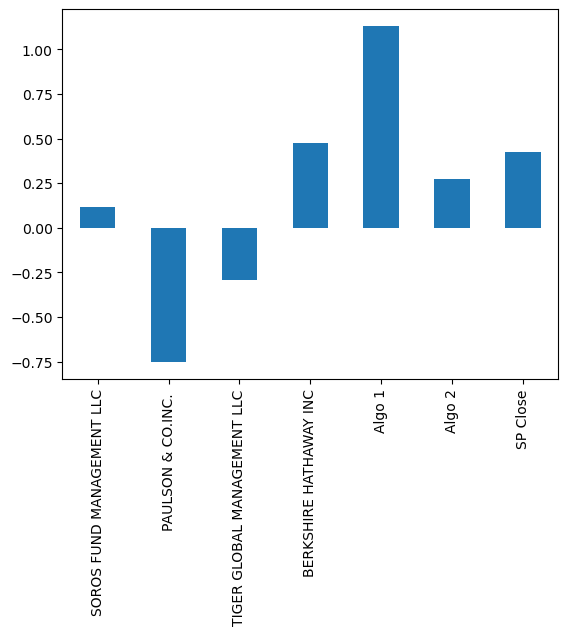

In [53]:
# Visualize the sharpe ratios as a bar plot
display(annualized_sharpe_ratio.plot(kind="bar"))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms the SP500 but Algo 2 does not. Algo 1 outperforms the whale portfolio, but Algo 2 only outperforms Tiger, Paulson, and Soros Fund.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [54]:
# Reading data from 1st stock
google_csv_path = Path("/Users/matt/Desktop/Custom_Portfolio/GOOG.csv")
google_csv_df = pd.read_csv(google_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
google_csv_df = google_csv_df["Close"].rename("GOOGL")
google_csv_df.head()

Date
2015-03-04    28.590006
2015-03-05    28.687738
2015-03-06    28.306534
2015-03-09    28.364626
2015-03-10    27.674520
Name: GOOGL, dtype: float64

In [56]:
# Reading data from 2nd stock
amazon_csv_path = Path("/Users/matt/Desktop/Custom_Portfolio/AMZN.csv")
amazon_csv_df = pd.read_csv(amazon_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
amazon_csv_df = amazon_csv_df["Close"].rename("AMZN")
amazon_csv_df.head()

Date
2015-03-05    19.391500
2015-03-06    19.004499
2015-03-09    18.927999
2015-03-10    18.475500
2015-03-11    18.318501
Name: AMZN, dtype: float64

In [57]:
# Reading data from 3rd stock
disney_csv_path = Path("/Users/matt/Desktop/Custom_Portfolio/DIS.csv")
disney_csv_df = pd.read_csv(disney_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
disney_csv_df = disney_csv_df["Close"].rename("DIS")
disney_csv_df.head()

Date
2015-03-05    105.029999
2015-03-06    103.820000
2015-03-09    105.260002
2015-03-10    103.089996
2015-03-11    102.889999
Name: DIS, dtype: float64

In [58]:
# Combine all stocks in a single DataFrame
# axis = 0 joining bny row
all_custom_portfolio = pd.concat([google_csv_df, amazon_csv_df, disney_csv_df],axis=1, join="inner")
display(all_custom_portfolio)

,GOOGL,AMZN,DIS
Date,,,
2015-03-05,28.687738,19.391500,105.029999
2015-03-06,28.306534,19.004499,103.820000
2015-03-09,28.364626,18.927999,105.260002
2015-03-10,27.674520,18.475500,103.089996
2015-03-11,27.483543,18.318501,102.889999
...,...,...,...
2019-04-15,61.055000,92.243500,132.039993
2019-04-16,61.356499,93.152000,129.899994
2019-04-17,61.817001,93.240997,131.750000


In [59]:
# Reset Date index
# all_portfolios = .setindex("Close")

In [60]:
# Reorganize portfolio data by having a column per symbol


In [61]:
# Calculate daily returns
daily_returns = all_custom_portfolio.pct_change()
clean_port = daily_returns.dropna()
# Display sample data
display(clean_port)


,GOOGL,AMZN,DIS
Date,,,
2015-03-06,-0.013288,-0.019957,-0.011521
2015-03-09,0.002052,-0.004025,0.013870
2015-03-10,-0.024330,-0.023906,-0.020616
2015-03-11,-0.006901,-0.008498,-0.001940
2015-03-12,0.007856,0.021481,0.041598
...,...,...,...
2019-04-15,0.002652,0.000982,0.015224
2019-04-16,0.004938,0.009849,-0.016207
2019-04-17,0.007505,0.000955,0.014242


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [62]:
# Set weights
weights = [1/3, 1/3, 1/3]
weighted_returns = clean_port.dot(weights)
# print(weighted_returns)

# # Calculate portfolio return
# # Display sample data
# display(weighted_returns)

custom_df=weighted_returns.to_frame("Custom Returns")
display(custom_df)


,Custom Returns
Date,
2015-03-06,-0.014922
2015-03-09,0.003966
2015-03-10,-0.022951
2015-03-11,-0.005780
2015-03-12,0.023645
...,...
2019-04-15,0.006286
2019-04-16,-0.000473
2019-04-17,0.007568


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [63]:
# Join your returns DataFrame to the original returns DataFrame
# all_portfolios.reset_index(drop=True, inplace=True)
custom_og_portfolio = pd.concat([all_portfolios, custom_df], axis=1, join="inner")
display(custom_og_portfolio)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close,Custom Returns
Date,,,,,,,,
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.014922
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003966
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.022951
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918,-0.005780
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601,0.023645
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.006286
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000473
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007568


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_og_portfolio.dropna()
display(custom_og_portfolio)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close,Custom Returns
Date,,,,,,,,
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.014922
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.003966
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.022951
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918,-0.005780
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601,0.023645
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.006286
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000473
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007568


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
std_portfolio = custom_og_portfolio.std()
annualized_std_portfolio = std_portfolio * np.sqrt(252)
display(annualized_std_portfolio)



SOROS FUND MANAGEMENT LLC      0.125509
PAULSON & CO.INC.              0.111630
TIGER GLOBAL MANAGEMENT LLC    0.173231
BERKSHIRE HATHAWAY INC         0.205314
Algo 1                         0.121086
Algo 2                         0.132583
SP Close                       0.135941
Custom Returns                 0.197032
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

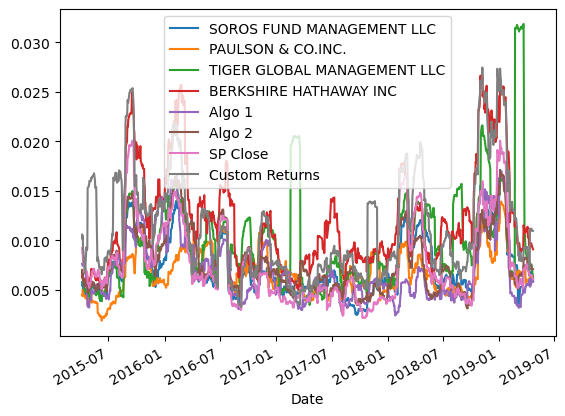

In [66]:
# Calculate rolling standard deviation
rolling_std = custom_og_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [70]:
# Calculate and plot the correlation
corr_std = custom_og_portfolio.corr()
display(corr_std)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP Close,Custom Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699770,0.561104,0.754109,0.321550,0.826675,0.838119,0.674503
PAULSON & CO.INC.,0.699770,1.000000,0.434504,0.545119,0.269459,0.678038,0.670020,0.518878
TIGER GLOBAL MANAGEMENT LLC,0.561104,0.434504,1.000000,0.424209,0.164023,0.507210,0.623838,0.477826
BERKSHIRE HATHAWAY INC,0.754109,0.545119,0.424209,1.000000,0.292249,0.687693,0.751398,0.718993
Algo 1,0.321550,0.269459,0.164023,0.292249,1.000000,0.288478,0.278622,0.254327
Algo 2,0.826675,0.678038,0.507210,0.687693,0.288478,1.000000,0.859032,0.637252
SP Close,0.838119,0.670020,0.623838,0.751398,0.278622,0.859032,1.000000,0.789680
Custom Returns,0.674503,0.518878,0.477826,0.718993,0.254327,0.637252,0.789680,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [71]:
# Calculate and plot Beta

covariance_custom = custom_og_portfolio["Custom Returns"].rolling(window=60).cov(all_portfolios["SP Close"])
# display(covariance)
index_variance = all_portfolios["SP Close"].rolling(60).var()
beta = covariance / index_variance

display(beta)



Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 1043, dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Calculate Annualized Sharpe Ratios
custom_mean_return=custom_og_portfolio.mean() * 252
custom_std_return=custom_og_portfolio.std() * np.sqrt(252)
risk_free_rate=.03
annualized_custom_sharpe_ratio=(custom_mean_return - risk_free_rate) / custom_std_return
display(annualized_custom_sharpe_ratio)




SOROS FUND MANAGEMENT LLC      0.094792
PAULSON & CO.INC.             -0.766207
TIGER GLOBAL MANAGEMENT LLC   -0.302615
BERKSHIRE HATHAWAY INC         0.456516
Algo 1                         1.147891
Algo 2                         0.248244
SP Close                       0.427357
Custom Returns                 1.064567
dtype: float64

<Axes: >

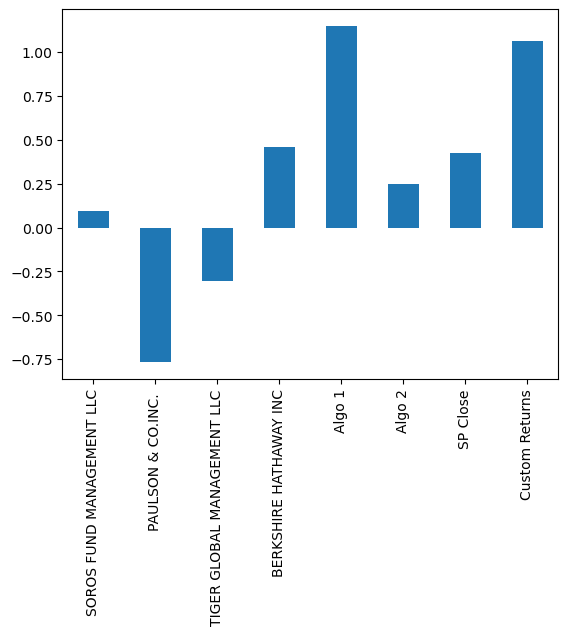

In [73]:
# Visualize the sharpe ratios as a bar plot
annualized_custom_sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

My custom portfolio outperforms all portfolios except for the Algo 1 portfolio.